In [1]:
import pandas as pd, re
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
# function to split date into binary attributes

def add_datepart(df, fldnames, drop=True, time=False, errors="raise"):
    if isinstance(fldnames,str): 
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
        if time: attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
        df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: df.drop(fldname, axis=1, inplace=True)

In [3]:
df = pd.read_csv('SeattleFleetEquipmentSales.csv', parse_dates=['SALE_DATE'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
EQUIP_ID          1055 non-null object
YEAR              1055 non-null int64
MAKE              1055 non-null object
MODEL             1055 non-null object
DESCRIPTION       1055 non-null object
DEPT              1055 non-null object
SALE_PRICE        1055 non-null float64
SALE_DATE         1055 non-null datetime64[ns]
SOLD_BY           1055 non-null object
VIN               1055 non-null object
Equipment Type    1055 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 90.7+ KB


In [5]:
add_datepart(df, 'SALE_DATE')

In [6]:
df = pd.get_dummies(df, columns=['DEPT','SOLD_BY','MAKE','MODEL','Equipment Type','DESCRIPTION'])

In [7]:
df[:5].transpose().head(10)

,0,1,2,3,4
EQUIP_ID,3872,98242,98243,93809,98244
YEAR,2000,2009,2009,2009,2009
SALE_PRICE,9600,3050,3800,8600,1500
VIN,5B4KP32Y3Y3322902,2W9MPH6199S044105,2W9MPHS044106,MOXUVGX032927,2W9MPH6129S044107
SALE_DATEYear,2016,2017,2017,2017,2017
SALE_DATEMonth,4,8,6,2,6
SALE_DATEWeek,16,34,26,5,26
SALE_DATEDay,19,21,29,1,29
SALE_DATEDayofweek,1,0,3,2,3
SALE_DATEDayofyear,110,233,180,32,180


In [8]:
df['YEARS_OLD'] = df['SALE_DATEYear'] - df['YEAR']

In [9]:
df.describe()

,YEAR,SALE_PRICE,SALE_DATEYear,SALE_DATEMonth,SALE_DATEWeek,SALE_DATEDay,SALE_DATEDayofweek,SALE_DATEDayofyear,SALE_DATEElapsed,DEPT_CEN,...,DESCRIPTION_VAN CARGO CAMERA WITH GENERATOR 313841,DESCRIPTION_VAN CARGO E250,DESCRIPTION_VAN CARGO SPRINTER 3500 9990GVW,DESCRIPTION_VAN PASSENGER,DESCRIPTION_VAN PASSENGER FULL SIZE,DESCRIPTION_VAN WALK IN,DESCRIPTION_WALKIN VAN - CLASS 4,DESCRIPTION_WHEEL LOADER - 29000 LB,DESCRIPTION_YARD SWEEPER - SELF PROPELLED,YEARS_OLD
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,2006.364929,9061.214493,2017.418009,6.465403,26.197156,14.837915,2.151659,180.374408,1.511887e+09,0.019905,...,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.004739,0.003791,0.000948,11.053081
std,4.511476,12253.906963,1.086688,3.394728,15.004964,9.568949,1.231210,104.893282,3.605349e+07,0.139741,...,0.030787,0.030787,0.030787,0.030787,0.030787,0.030787,0.068712,0.061487,0.030787,4.500793
min,1940.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,0.000000,5.000000,1.452038e+09,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2005.000000,3014.500000,2016.000000,3.000000,11.000000,6.000000,1.000000,72.000000,1.480723e+09,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,2007.000000,5500.000000,2017.000000,6.000000,26.000000,14.000000,2.000000,176.000000,1.513037e+09,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,2008.000000,9700.000000,2018.000000,10.000000,40.000000,24.000000,3.000000,278.000000,1.544659e+09,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
max,2017.000000,145000.000000,2019.000000,12.000000,52.000000,31.000000,4.000000,362.000000,1.572221e+09,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.000000


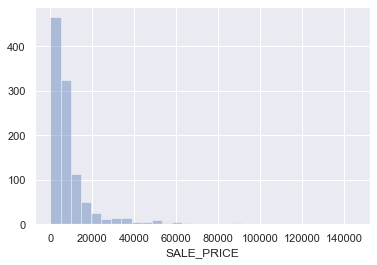

In [10]:
sns.distplot(df['SALE_PRICE'], kde=False, bins=30)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [12]:
feature_col = df.select_dtypes(include=['integer'])

In [13]:
features = feature_col.columns.values

In [54]:
features

array(['YEAR', 'SALE_DATEYear', 'SALE_DATEMonth', 'SALE_DATEWeek',
       'SALE_DATEDay', 'SALE_DATEDayofweek', 'SALE_DATEDayofyear',
       'SALE_DATEElapsed', 'DEPT_CEN', 'DEPT_DON'], dtype=object)

In [31]:
target = 'SALE_PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
rf = RandomForestRegressor(n_estimators=250, oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [55]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

test_score = r2_score(y_test, predicted_test)
train_score = r2_score(y_train, predicted_train)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Train data R-2 score: {train_score:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.627
Train data R-2 score:  0.94
Test data R-2 score: 0.859
Test data Spearman correlation: 0.862
Test data Pearson correlation: 0.93


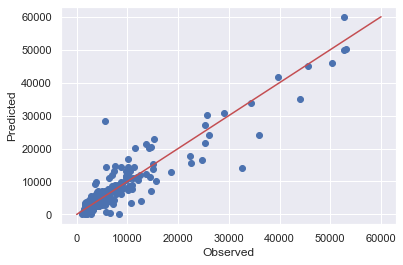

In [49]:
y_pred = rf.predict(X_test)

# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Observed')
plt.ylabel('Predicted')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()